In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

fuel_econ=pd.read_csv('./fuel-econ.csv')
sedan_classes=['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass']=fuel_econ['VClass'].astype(vclasses)

fuel_econ['trans_type']=fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


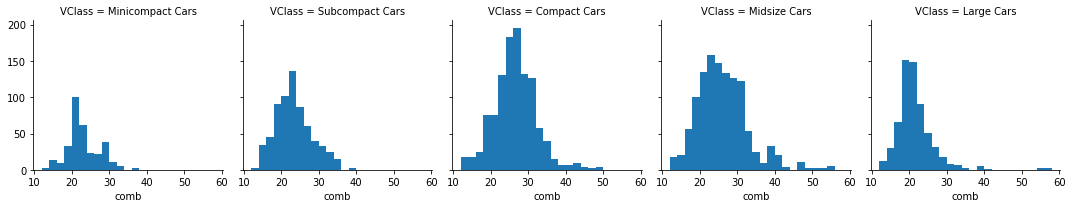

In [5]:
bins=np.arange(12,58+2,2)
g=sb.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.hist, 'comb', bins=bins);

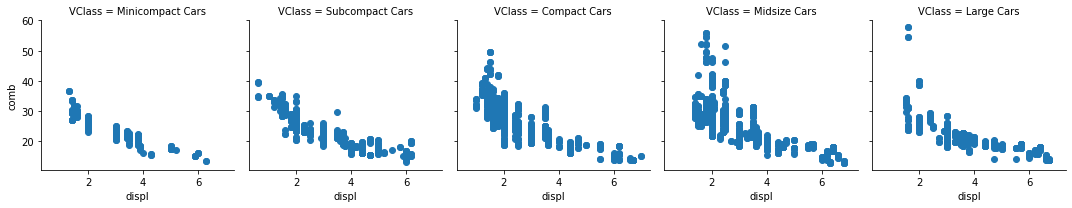

In [8]:
g=sb.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.scatter, 'displ','comb');

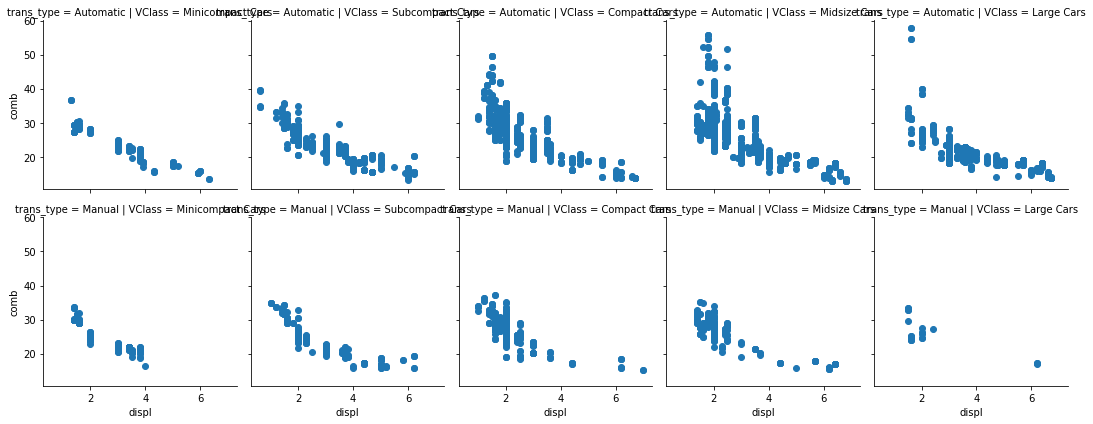

In [10]:
g=sb.FacetGrid(data=fuel_econ, col='VClass', row='trans_type')
g.map(plt.scatter,'displ','comb');

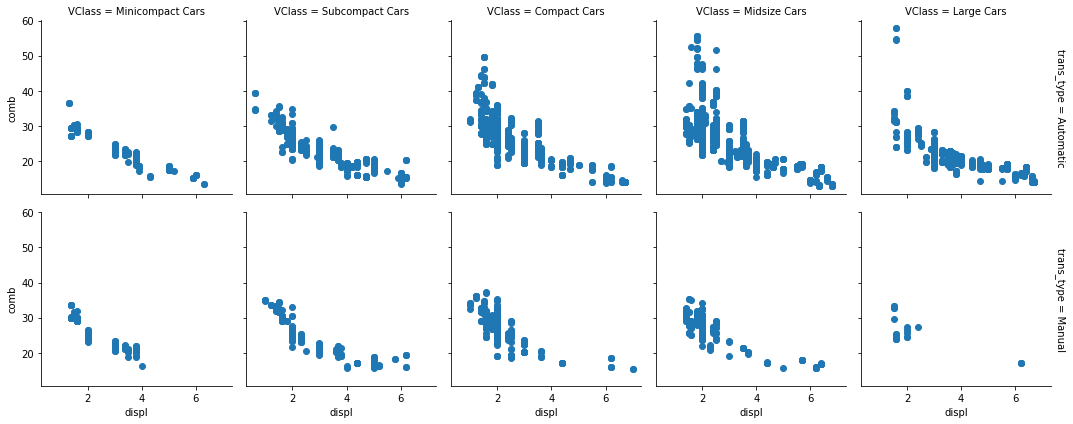

In [13]:
g=sb.FacetGrid(data=fuel_econ, col='VClass', row='trans_type',
              margin_titles=True)
g.map(plt.scatter, 'displ','comb');

C:\Users\nihar\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


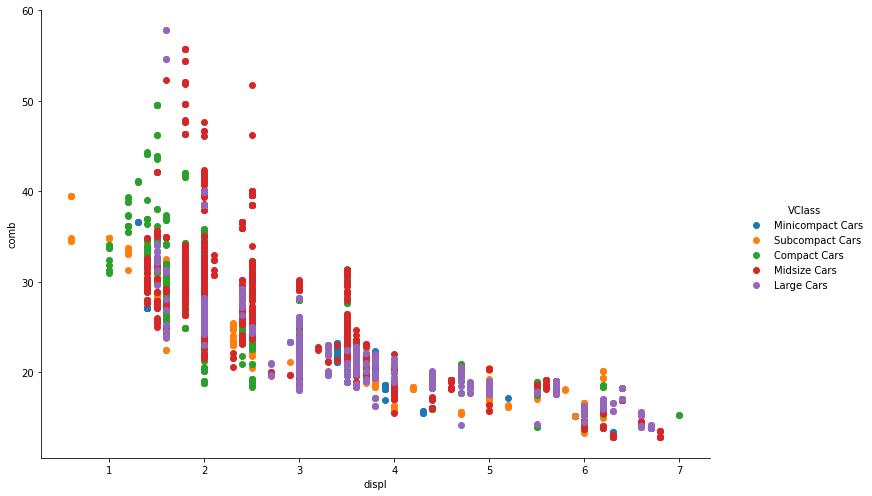

In [25]:
g=sb.FacetGrid(data=fuel_econ, hue='VClass',margin_titles=True,size=7, aspect=1.5)
g=g.map(plt.scatter, 'displ','comb')
g.add_legend()